In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [3]:
nosadf = pd.read_table('P2P511new/2.phy.nosa.xml.log', delimiter='\t', skiprows=257)

In [7]:
sadf = pd.read_table('P2P511new/2.phy.sa.xml.log', delimiter='\t', skiprows=257)

In [8]:
intburn = int(round(len(nosadf)*.3))

In [9]:
sample_nosadf = nosadf.loc[intburn:, :]
sample_sadf = sadf.loc[intburn:, :]

In [10]:
sample_nosadf.sort_values('likelihood', ascending=False, inplace=True)
sample_sadf.sort_values('likelihood', ascending=False, inplace=True)


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
hpd_val = int(round(len(sample_nosadf)*.95))

hpd_nosadf = pd.DataFrame(sample_nosadf[:hpd_val])
hpd_sadf = pd.DataFrame(sample_sadf[:hpd_val])


In [12]:
slim_nosa = hpd_nosadf[['mrcatime(one)', 'mrcatime(two)', 'mrcatime(three)']]
slim_sa = hpd_sadf[['mrcatime(one)', 'mrcatime(two)', 'mrcatime(three)']]
slim_sa['ident'] = 'sa'
slim_nosa['ident'] = 'nosa'
mega_df = slim_sa.append([slim_nosa])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
groupobj = mega_df.groupby('ident')

In [22]:
groupobj.boxplot(whis="range", return_type='dict', showmeans=True, meanline=True, usermedians=['4','3','.75'])


OrderedDict([('nosa',
              {'boxes': [<matplotlib.lines.Line2D at 0x10d30ff60>,
               'caps': [<matplotlib.lines.Line2D at 0x10b2326a0>,
               'fliers': [<matplotlib.lines.Line2D at 0x10b14c518>,
               'means': [<matplotlib.lines.Line2D at 0x10b249898>,
               'medians': [<matplotlib.lines.Line2D at 0x10b1546a0>,
               'whiskers': [<matplotlib.lines.Line2D at 0x10b24dc18>,
                <matplotlib.lines.Line2D at 0x10d3eefd0>]}),
             ('sa',
              {'boxes': [<matplotlib.lines.Line2D at 0x10b161978>,
               'caps': [<matplotlib.lines.Line2D at 0x10d40aba8>,
               'fliers': [<matplotlib.lines.Line2D at 0x10d415a90>,
               'means': [<matplotlib.lines.Line2D at 0x10d411b70>,
               'medians': [<matplotlib.lines.Line2D at 0x10d405278>,
               'whiskers': [<matplotlib.lines.Line2D at 0x10d4057f0>,
                <matplotlib.lines.Line2D at 0x10d431fd0>]})])

In [32]:
mega_df.boxplot(by='ident')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d56f908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1048f3ef0>]], dtype=object)

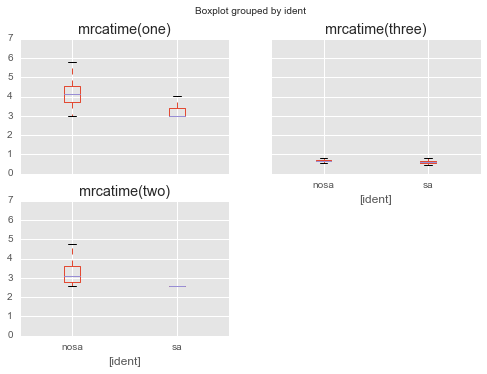

In [33]:
plt.show()

In [23]:
sns.boxplot(data=slim_nosa)
sns.stripplot(data=slim_nosa,
              size=4, jitter=True, edgecolor="gray")

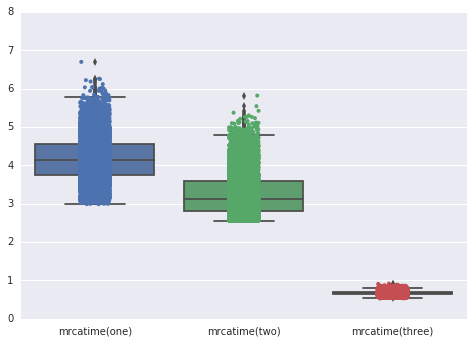

In [24]:
plt.show()
